In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')



# Parte 02 - Escolha da Base de Dados

In [2]:

!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data
with zipfile.ZipFile("unsupervised-learning-on-country-data.zip", 'r') as zip_ref:
    zip_ref.extractall(".")



Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
License(s): MIT
unsupervised-learning-on-country-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
df = pd.read_csv("Country-data.csv")
df.head()

num_countries = df["country"].nunique()
print("Quantos países existem no dataset?")
print(f"Existem {num_countries} países no dataset.")


Quantos países existem no dataset?
Existem 167 países no dataset.


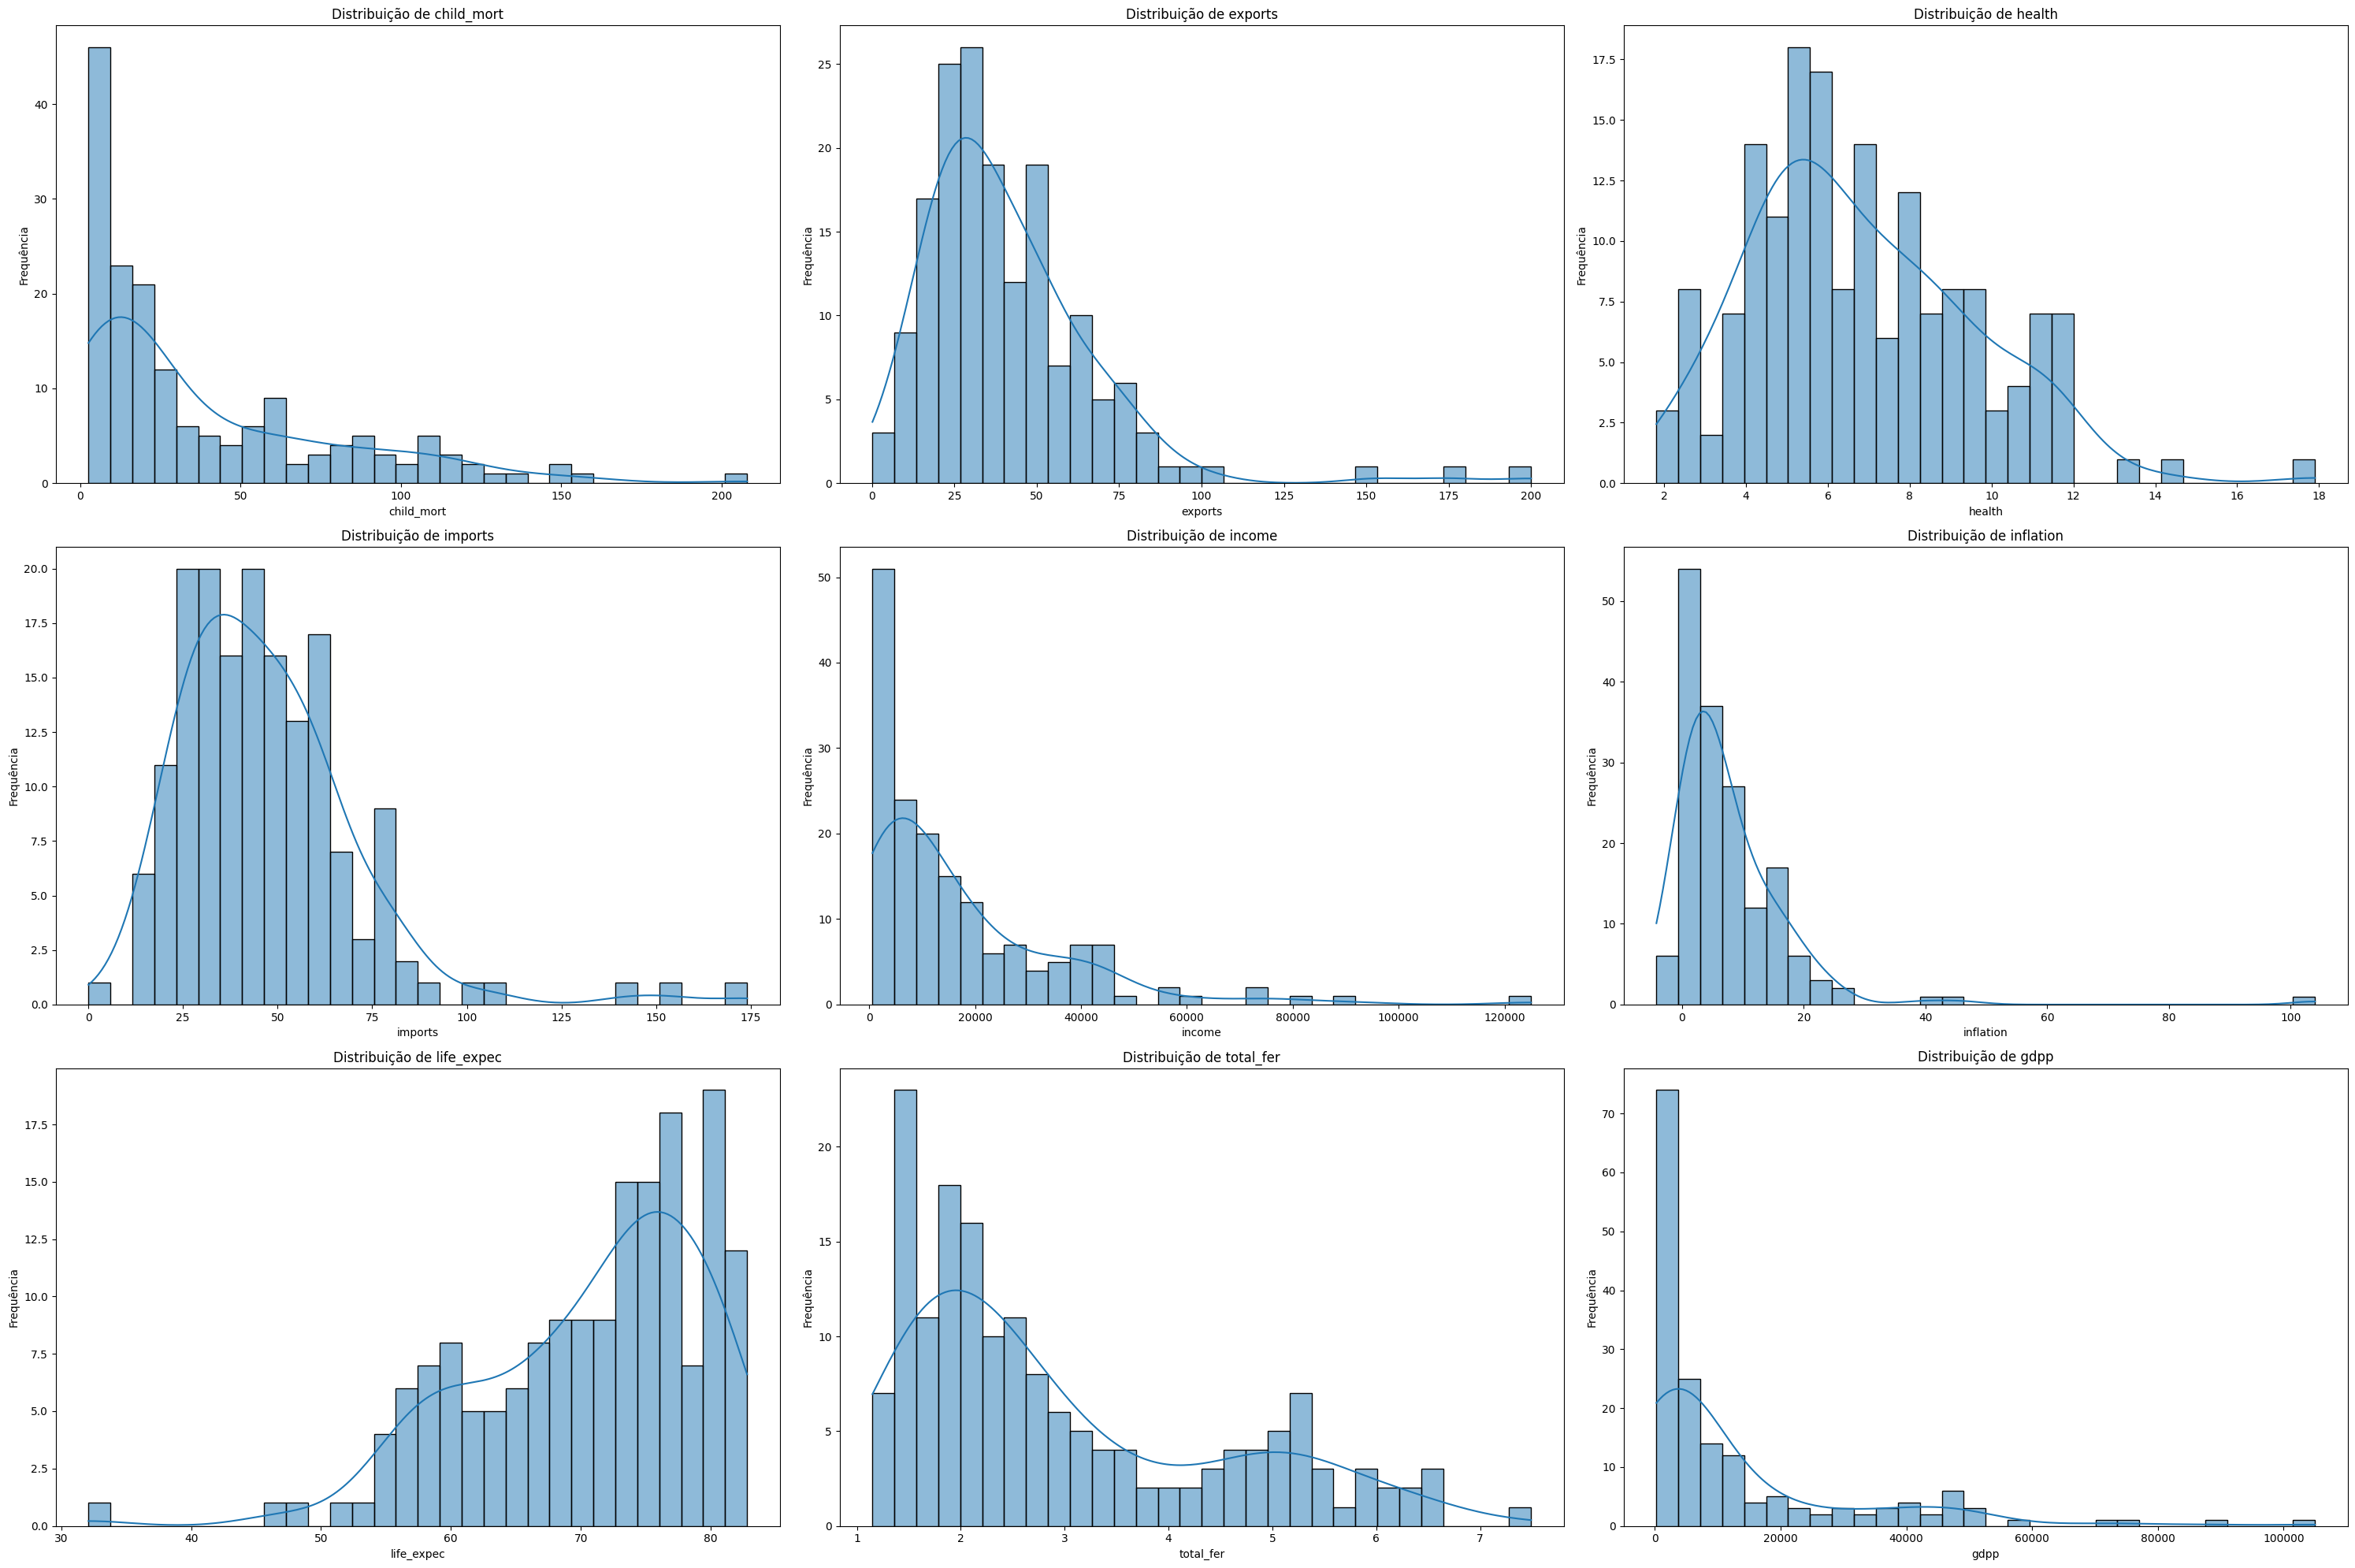

In [4]:
variaveis = df.columns.drop("country")

# 
plt.figure(figsize=(30, 20))
for i, var in enumerate(variaveis):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

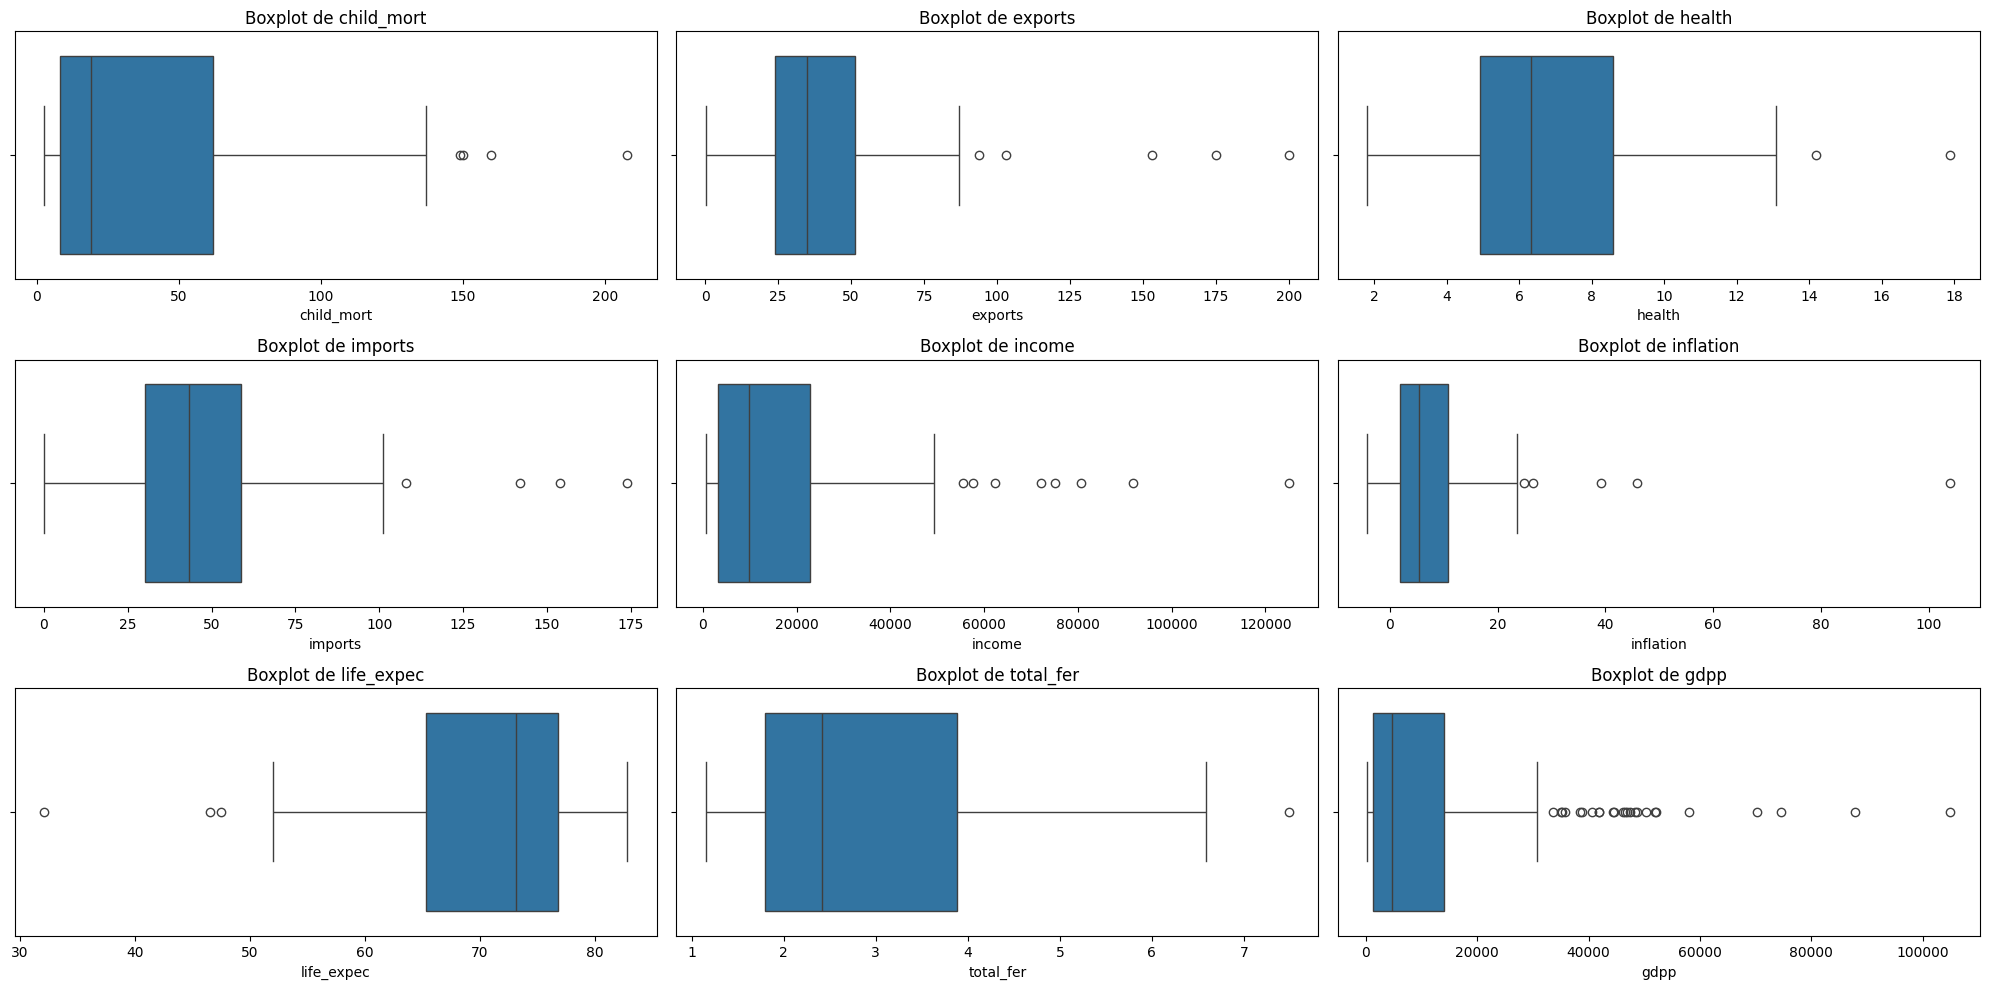

In [5]:
plt.figure(figsize=(20, 10))
for i, var in enumerate(variaveis):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

As variáveis têm escalas muito diferentes (ex: income e gdpp têm valores muito maiores que health)
Existem outliers significativos em várias variáveis
Algumas distribuições são assimétricas (especialmente child_mort e income)

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Min-Max Scaling: Transforma os dados para uma faixa entre 0 e 1.
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df[variaveis])

#Z-score Normalization: Transforma os dados para que tenham média 0 e desvio padrão 1.
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df[variaveis])

In [7]:
df['child_mort'] = np.log1p(df['child_mort'])  # log(1+x) para evitar log(0)
df['income'] = np.log1p(df['income'])

data_normalized_df = pd.DataFrame(data_normalized, columns=variaveis)

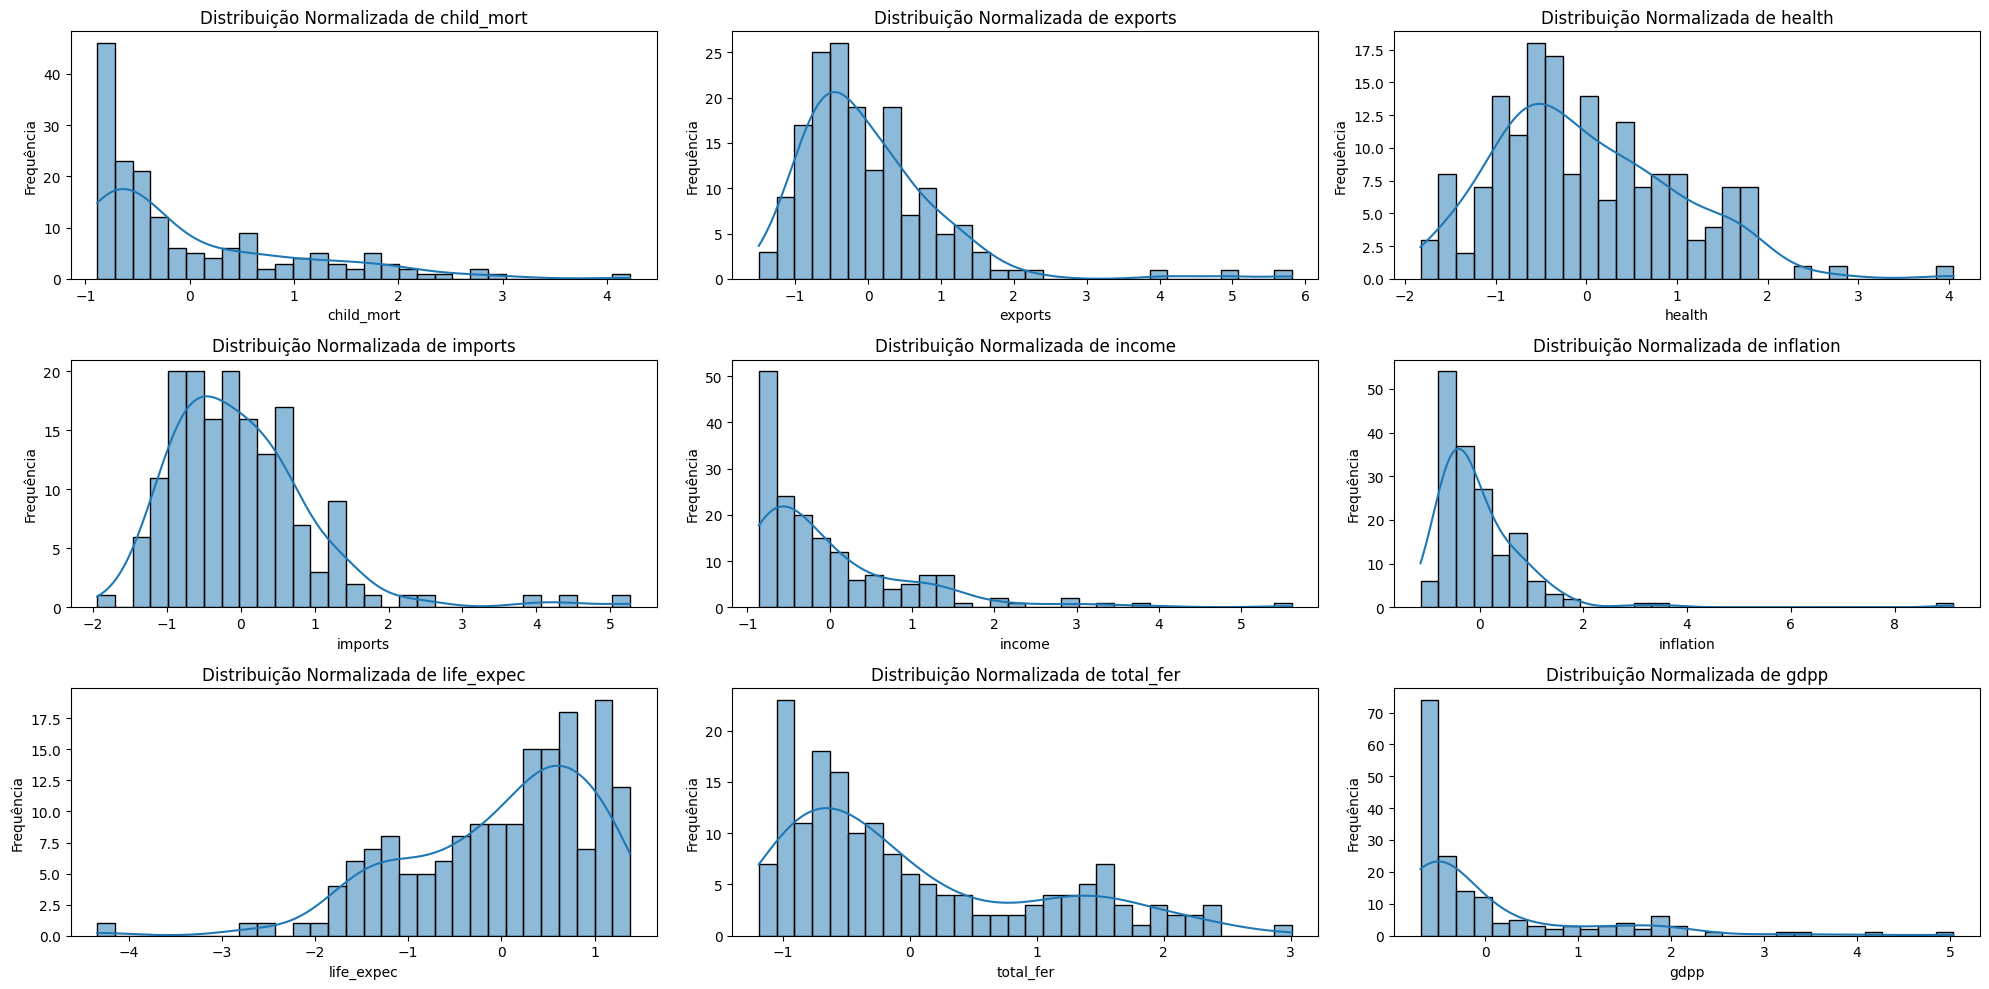

In [8]:
plt.figure(figsize=(20, 10))

for i, var in enumerate(variaveis):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_normalized_df[var], bins=30, kde=True)
    plt.title(f'Distribuição Normalizada de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

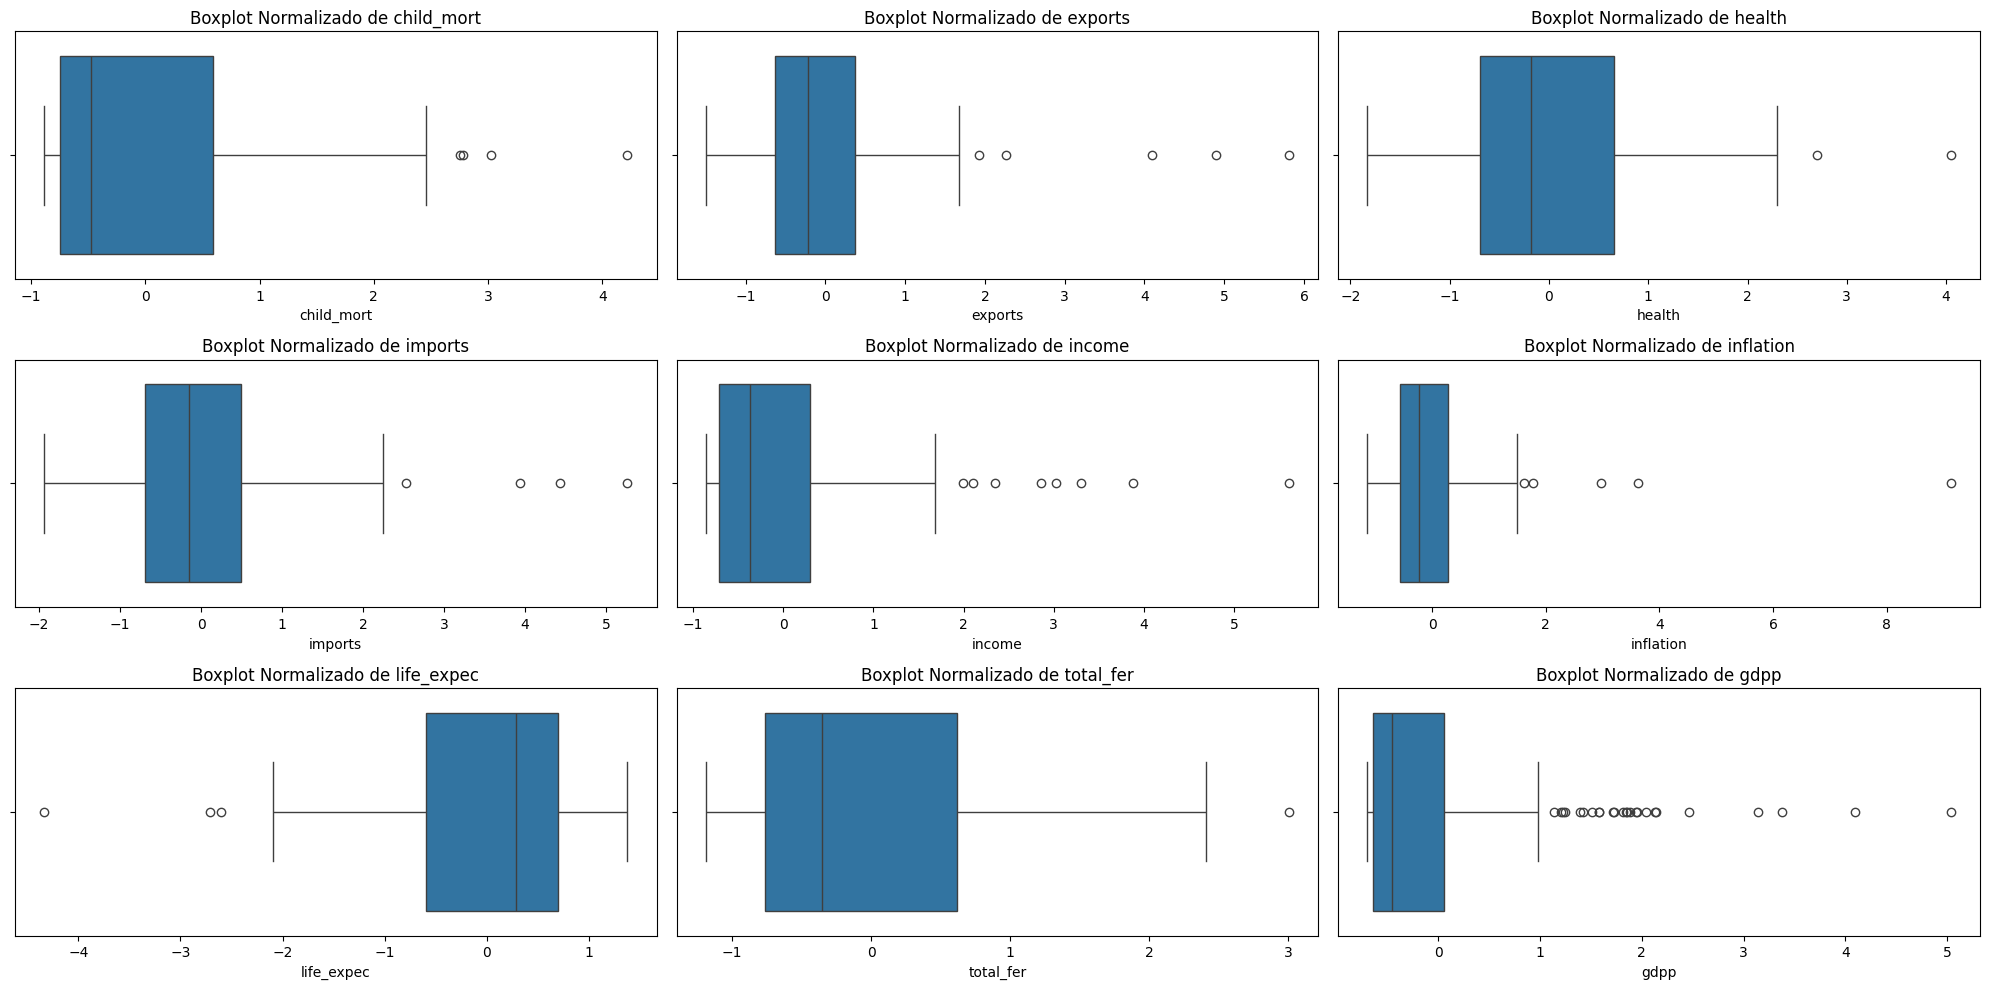

In [9]:
plt.figure(figsize=(20, 10))

for i, var in enumerate(variaveis):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data_normalized_df[var])
    plt.title(f'Boxplot Normalizado de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

# Parte 03 - Clusterização

In [10]:
#K-means	
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_normalized_df)
labels = kmeans.labels_
df['Cluster_KMeans'] = labels


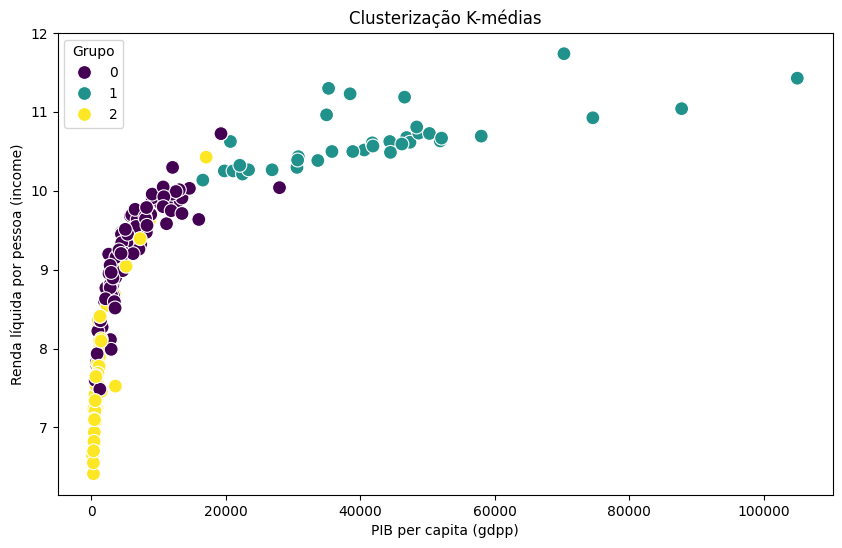

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdpp', y='income', hue='Cluster_KMeans', palette='viridis', s=100)
plt.title('Clusterização K-médias')
plt.xlabel('PIB per capita (gdpp)')
plt.ylabel('Renda líquida por pessoa (income)')
plt.legend(title='Grupo')
plt.show()

In [12]:
cluster_summary = df.groupby('Cluster_KMeans')[variaveis].mean().reset_index()
print(cluster_summary)

   Cluster_KMeans  child_mort    exports    health    imports     income  \
0               0    2.984170  40.273128  6.251047  47.362394   9.205878   
1               1    1.737002  58.738889  8.807778  51.491667  10.653989   
2               2    4.514685  28.602444  6.301111  42.306667   7.712471   

   inflation  life_expec  total_fer          gdpp  
0   7.720884   72.566279   2.340349   6461.767442  
1   2.671250   80.127778   1.752778  42494.444444  
2  11.986778   59.055556   5.065333   1766.711111  


### Análise dos Clusters
- Cluster 0
    - Mortalidade Infantil (child_mort): 0.861 (relativamente baixa)
    - Exportações (exports): 40.27% do PIB per capita
    - Gastos em Saúde (health): 6.25% do PIB per capita
    - Importações (imports): 47.36% do PIB per capita
    - Renda Líquida (income): 1.20
    - Inflação (inflation): 7.72%
    - Expectativa de Vida (life_expec): 72.57 anos
    - Fertilidade Total (total_fer): 2.34 filhos por mulher
    - PIB per capita (gdpp): $6461.77

Este cluster inclui países com uma mortalidade infantil relativamente baixa e um PIB per capita moderado. A renda e os gastos em saúde são também moderados, sugerindo que esses países estão em um estágio de desenvolvimento intermediário.

- Cluster 1
    - Mortalidade Infantil (child_mort): 0.692 (baixa)
    - Exportações (exports): 58.74% do PIB per capita
    - Gastos em Saúde (health): 8.81% do PIB per capita
    - Importações (imports): 51.49% do PIB per capita
    - Renda Líquida (income): 1.24
    - Inflação (inflation): 2.67%
    - Expectativa de Vida (life_expec): 80.13 anos
    - Fertilidade Total (total_fer): 1.75 filhos por mulher
    - PIB per capita (gdpp): $42494.44

Este cluster inclui países com alta expectativa de vida, baixa mortalidade infantil e altos níveis de exportação e importação, indicando economias desenvolvidas ou em desenvolvimento avançado. Os gastos em saúde são mais elevados, refletindo um investimento significativo na saúde pública.

- Cluster 2
    - Mortalidade Infantil (child_mort): 0.995 (alta)
    - Exportações (exports): 28.60% do PIB per capita
    - Gastos em Saúde (health): 6.30% do PIB per capita
    - Importações (imports): 42.31% do PIB per capita
    - Renda Líquida (income): 1.15
    - Inflação (inflation): 11.99%
    - Expectativa de Vida (life_expec): 59.06 anos
    - Fertilidade Total (total_fer): 5.07 filhos por mulher
    - PIB per capita (gdpp): $1766.71

Este cluster é caracterizado por uma alta mortalidade infantil, uma expectativa de vida mais baixa e um PIB per capita muito baixo, sugerindo que esses países enfrentam desafios significativos em termos de desenvolvimento econômico e saúde pública.

### País Representativo para Cada Cluster

- Cluster 0
    - País representativo poderia ser "Brasil", pois apresenta características econômicas e sociais que se alinham com a média deste cluster.

- Cluster 1
    - País representativo poderia ser "Alemanha", pois possui altos níveis de exportação, gastos em saúde e uma expectativa de vida elevada, refletindo as médias deste grupo.

- Cluster 2
    - País representativo poderia ser "Afeganistão", visto que, o país enfrenta altos índices de mortalidade infantil e baixos níveis de renda e expectativa de vida, exemplificando os desafios enfrentados por muitos países em desenvolvimento.

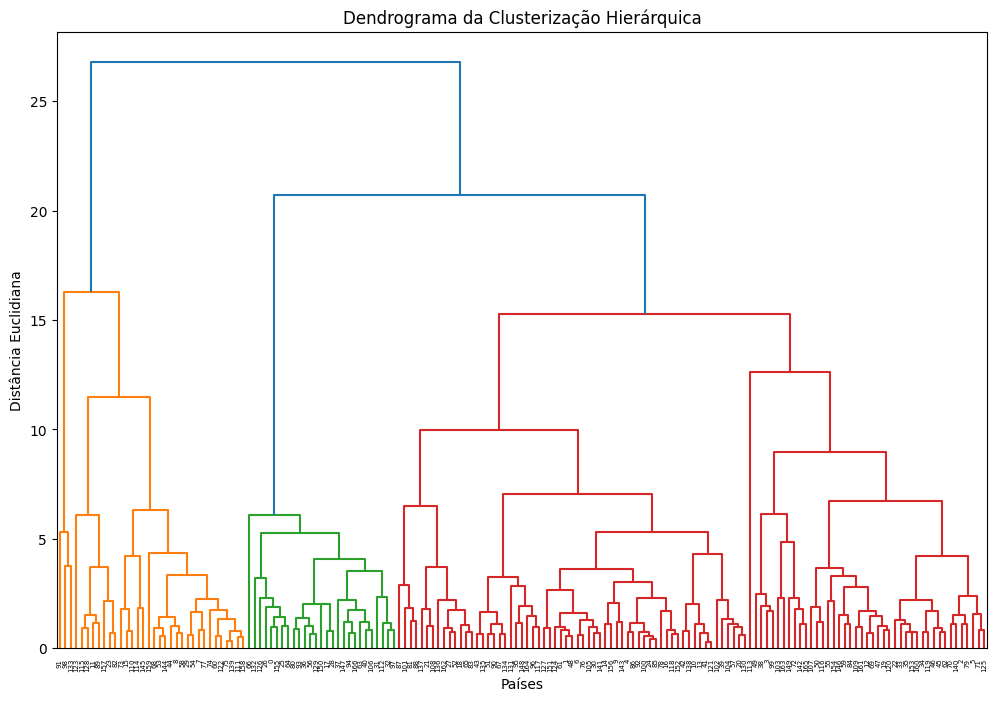

In [13]:
import scipy.cluster.hierarchy as sch

# Aplicar clusterização hierárquica
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(data_normalized_df, method='ward'))
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância Euclidiana')
plt.show()

### Clusters Principais

- Cluster Laranja: Este grupo menor pode incluir países que compartilham características socioeconômicas específicas, como altos níveis de desenvolvimento ou políticas de saúde eficazes. A alta similaridade entre eles pode indicar uma homogeneidade em termos de indicadores sociais e econômicos.

- Cluster Verde: Pode representar países que têm características únicas ou que estão em transição em termos de desenvolvimento. Isso pode incluir países que estão melhorando rapidamente ou que enfrentam desafios específicos.

- Cluster Vermelho: O maior grupo sugere que muitos países compartilham características comuns, possivelmente refletindo padrões globais em desenvolvimento econômico, saúde e outros fatores. Esse cluster pode incluir países com PIBs variados, mas com semelhanças em outros indicadores.


##### Interpretação

- A presença de distâncias próximas a 0 indica que os países dentro desses grupos são muito semelhantes entre si;
- A identificação de subgrupos dentro dos clusters principais sugere que, mesmo em grupos maiores, existem nuances que podem ser exploradas.
- Os clusters menores (laranja e verde) podem representar países que estão em situações únicas ou que têm políticas específicas que os diferenciam do padrão geral observado no cluster vermelho.

### Análise de semelhanças e diferenças entre os resultados

- Semelhanças
    - Ambos os métodos resultaram em três grupos principais, o que sugere que a estrutura dos dados é consistente independentemente do método utilizado.
    - Tanto a clusterização K-médias quanto a hierárquica identificaram padrões semelhantes entre os países, com agrupamentos que refletem características socioeconômicas comuns, como PIB, mortalidade infantil e renda.
    - Os clusters identificados em ambos os métodos podem conter países com características semelhantes, como níveis de desenvolvimento econômico, saúde pública e indicadores sociais.

- Diferenças
    - Método de Agrupamento:
        - K-médias é baseado em centroides e minimiza a variância dentro dos clusters. Ele pode ser sensível à escolha inicial dos centroides e à presença de outliers.
        - Clusterização Hierárquica constrói uma árvore de clusters (dendrograma) e não requer a definição prévia do número de clusters. Ele permite uma visualização mais detalhada das relações entre os grupos.
    - Tamanho dos Grupos
        - Na análise K-médias, um dos clusters (o vermelho) foi o maior, enquanto na clusterização hierárquica, o dendrograma pode mostrar uma estrutura mais complexa com subgrupos dentro dos clusters principais.
    - Interpretação das Distâncias:
        - Na clusterização hierárquica, a altura das fusões no dendrograma fornece informações sobre a dissimilaridade entre os grupos. Em contraste, no K-médias, as distâncias são calculadas em relação aos centroides dos clusters.

##### Interpretação dos resultados

- Consistência nos Agrupamentos: A similaridade nos resultados sugere que há padrões robustos nos dados que são capturados por ambos os métodos. Isso é encorajador para a análise, pois indica que as conclusões sobre as características dos países são confiáveis.

- Complexidade da Realidade: A clusterização hierárquica pode revelar subgrupos que não são imediatamente evidentes na abordagem K-médias. Isso sugere que a realidade socioeconômica é mais complexa do que uma simples divisão em três grupos.

# Parte 04 -> Escolha de Algoritmos

1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.


    1. Escolha do número de Clusters (K);
    2. Inicializar os centróides:
        - Selecionar aleatoriamente K pontos do conjunto de dados como os centros iniciais dos clusters (centróides);
    3. Atribuir pontos aos clusters:
        - Para cada ponto de dados, calcular a distância (geralmente euclidiana) entre o ponto e cada um dos K centróides. Atribuir cada ponto ao cluster cujo centróide está mais próximo;
    4. Atualizar centróides:
        - Após a atribuição, calcular novos centróides para cada cluster. O novo centróide é a média de todos os pontos atribuídos a esse cluster;
    5. Repetir etapas 3 e 4;
    6. Convergência:
        - O algoritmo é considerado convergido quando as atribuições dos pontos aos clusters não mudam mais ou quando as mudanças nos centróides são menores que um limite pré-definido.


2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.


    1. Escolha do número de Clusters (K);
    2. Inicializar os medóides:
        - Selecionar aleatoriamente K pontos do conjunto de dados como os medóides iniciais. Um medóide é o ponto real do conjunto de dados que representa o cluster;
    3. Atribuir pontos aos clusters:
        - Para cada ponto de dados, calcular a distância (geralmente euclidiana) entre o ponto e cada um dos K medóides. Atribuir cada ponto ao cluster cujo medóide está mais próximo;
    4. Atualizar medóides:
        - Para cada cluster, encontrar o ponto que está mais próximo da média (baricentro) dos pontos atribuídos a esse cluster. Esse ponto se torna o novo medóide do cluster. Isso é feito calculando a soma das distâncias de todos os pontos no cluster para determinar qual ponto tem a menor soma total de distâncias;
    5. Repetir etapas 3 e 4;
    6. Convergência:
        - O algoritmo é considerado convergido quando as atribuições dos pontos aos clusters não mudam mais ou quando os medóides não se alteram entre as iterações.



3.  O algoritmo de K-médias é sensível a outliers nos dados. Explique.
    

    O algoritmo de K-médias é sensível a outliers nos dados, e essa sensibilidade pode impactar significativamente os resultados da clusterização. Aqui estão algumas explicações sobre por que isso acontece:
        
- Cálculo de Centróides: o algoritmo K-médias calcula os centróides dos clusters como a média dos pontos atribuídos a cada cluster. Quando há outliers, esses valores extremos podem puxar a média para longe do grupo principal de dados, resultando em centróides que não representam adequadamente os dados normais do cluster.
- Impacto na Atribuição de Clusters: podem afetar a distância entre os pontos e os centróides, levando à atribuição incorreta de pontos aos clusters. Isso pode resultar em um agrupamento que não reflete as verdadeiras relações entre os dados12.
- Distorção dos Grupos: A presença de outliers pode fazer com que o algoritmo identifique clusters que não existem ou que são muito diferentes dos padrões reais nos dados. Isso pode levar a uma má interpretação dos resultados e à formação de clusters com características heterogêneas.
- Convergência para Soluções Subótimas: devido à influência dos outliers, o algoritmo pode convergir para soluções subótimas, onde os clusters não são compactos e bem definidos. Isso compromete a qualidade da clusterização e a capacidade de generalização do modelo.


4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?


O algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é mais robusto à presença de outliers por várias razões que se baseiam em sua abordagem de agrupamento. 
   
- Classifica pontos que não pertencem a nenhum cluster como "ruído" ou outliers. Isso significa que, ao invés de forçar esses pontos a se encaixarem em um cluster, o algoritmo os identifica e os trata como dados não relevantes para a formação de clusters.
- Agrupa dados com base na densidade dos pontos, considera que um cluster é uma região densa de pontos separados por áreas de baixa densidade. Isso permite que o algoritmo identifique clusters de forma mais flexível, independentemente da forma ou tamanho, e ignore outliers que estão em regiões de baixa densidade.
- Utiliza dois parâmetros principais: epsilon (ε), que define a distância máxima entre dois pontos para serem considerados vizinhos, e min_samples, que determina o número mínimo de pontos necessários para formar um cluster denso. Esses parâmetros permitem que o algoritmo se adapte a diferentes distribuições de dados e ignore outliers sem afetar a formação dos clusters 23.
- Ao contrário de algoritmos como K-médias, que pressupõem formas esféricas para os clusters, o DBSCAN pode lidar com clusters de formas arbitrárias. Isso significa que ele pode identificar grupos significativos mesmo na presença de outliers, que podem estar localizados longe dos clusters principais.
- Ao identificar pontos isolados como ruído, o DBSCAN ajuda a reduzir a quantidade de falsos positivos na detecção de outliers. Isso melhora a precisão da análise, permitindo focar em dados mais relevantes.